In [67]:
import graphlab
graphlab.canvas.set_target('ipynb')

# Load Data
sales = graphlab.SFrame('home_data.gl')
# split data into training data and test data
train_data, test_data = sales.random_split(.8,seed=0)
sales.show(view="Scatter Plot", x = 'sqft_living', y = 'price')

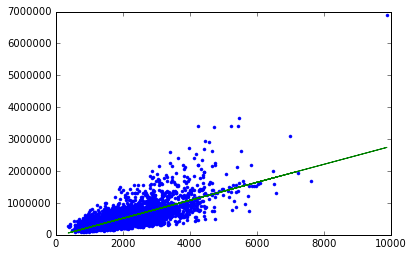

In [68]:
# let's see how our predictions look like
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_model.predict(test_data), '-'
        )

In [69]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

In [70]:
# result 1
print sales[sales['zipcode'] == '98039']['price'].mean()
# result 2
print sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)].num_rows()/(sales.num_rows() + 0.0)

2160606.6
0.421875722945


In [71]:
# various features
sqft_features = ['sqft_living']
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade', 'waterfront','view', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', ]

In [72]:
# creating models
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=sqft_features,validation_set=None)
my_model = graphlab.linear_regression.create(train_data, target='price', features=my_features,validation_set=None)
advance_model = graphlab.linear_regression.create(train_data, target='price', features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.005068     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.032315     | 3763208.270524     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.081341     | 3469012.450487     | 154580.940732 |

| 2         | 3        | 0.140950     | 3469012.450673     | 154580.940735 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [73]:
# evaluating models on the test data
print sqft_model.evaluate(test_data)
print my_model.evaluate(test_data)
print advance_model.evaluate(test_data)
print my_model.evaluate(test_data)['rmse'] - advance_model.evaluate(test_data)['rmse']

{'max_error': 4143550.8825285956, 'rmse': 255191.0287052738}
{'max_error': 3486584.5093818563, 'rmse': 179542.4333126908}
{'max_error': 3556849.4138490623, 'rmse': 156831.11680200786}
22711.3165107


In [74]:
# coefficients
print sqft_model.get('coefficients')
print my_model.get('coefficients')
print advance_model.get('coefficients')

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -47114.0206702 | 4923.34437753 |
| sqft_living |  None | 281.957850166  | 2.16405465323 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -88006.8416466 | 13167.1778025 |
|   bedrooms  |   2   | 21165.5766369  |  4892.4148316 |
|   bedrooms  |   4   | -41706.3113919 | 3600.23032619 |
|   bedrooms  |   5   | -92815.3727611 |  6185.8669821 |
|   bedrooms  |   1   | 45824.7402238  | 15487.2986256 |
|   bedrooms  |   6   | -179627.840979 | 13060.1531948 |
|   bedrooms  |   7   | -370367.546312 | 33894.1528762 |
|   bedrooms  |   8   | -343106.520191 | 56609.2407592 |
|   bedro

In [75]:
house1 = sales[sales['id'] == '5309101200']
print house1['price']
print sqft_model.predict(house1)
print my_model.predict(house1)
print advance_model.predict(house1)

[620000, ... ]
[629584.8197281545]
[721918.9333272739]
[630754.0062246262]
